<a href="https://colab.research.google.com/github/engineereliab076/engineereliab076/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies(Libraries)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing

In [4]:
#load the csv data to pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#print first 5 rows in the dataframe\
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#check the number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
#getting the basic information abt the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking no of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
#getting the statistics measures of the dataframe
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
.positive correlation
.negative correlation

In [12]:
#correlation in data.....
correlation = gold_data.corr()


<ipython-input-12-315eb3f67ff7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

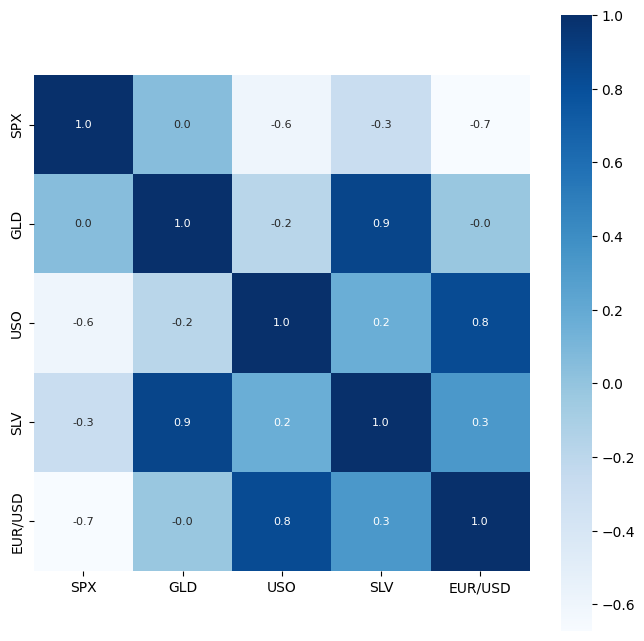

In [18]:
#heat map
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [19]:
#correlation of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-21-f86271c9f68b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

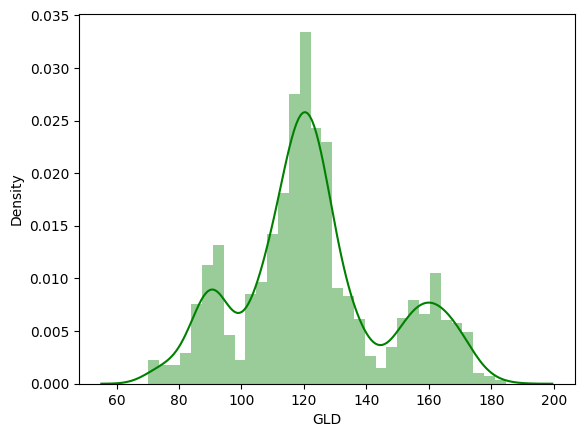

In [21]:
#CHECKING THE DISTRIBUTION OF GOLD PRICE
sns.distplot(gold_data['GLD'], color='green')

split data and labels

In [22]:
x = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [23]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


train test split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2,random_state=2)

Model Training
Random forest regressor

In [27]:
model = RandomForestRegressor(n_estimators=100)

In [28]:
model.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [33]:
#prediction on test data
test_data_pred = model.predict(x_test)

In [34]:
print(test_data_pred)

[168.48989989  86.51649936 114.78119942 ... 150.96310096  81.72610051
 149.25280171]


In [35]:
#R squaared error
error_score = metrics.r2_score(y_test,test_data_pred)
print(error_score)

0.9754433684676225


Comapre the actual values vs predicted values

In [41]:
#convert ytest to list
y_test = list()

AttributeError: ignored

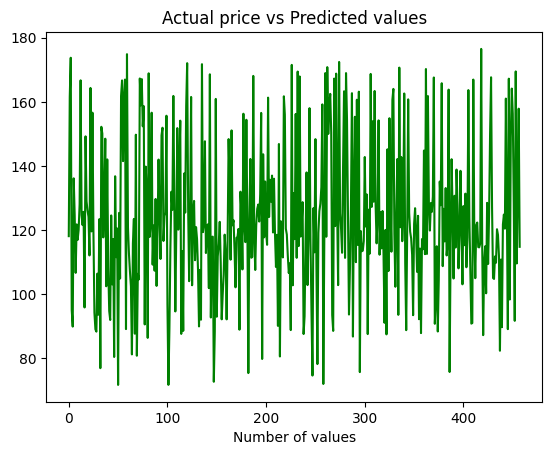

In [43]:
plt.plot(y_test, color='blue', label='Actual values')
plt.plot(test_data_pred, color='green', label='Predicted values')
plt.title('Actual price vs Predicted values')
plt.xlabel('Number of values')
plt.ylabEL('GLD')
plt.lengend()
plt.show()

In [38]:
#prediction on train data
train_data_pred = model.predict(x_train)

In [39]:
print(train_data_pred)

[118.04879989 161.47160296 173.75039934  94.94939897  89.81459837
 136.10599676 124.62139905 106.59219925 121.72690133 116.89450114
 119.99030135 128.02139899 166.70310241 124.6584008  121.5031022
 125.63609727  95.78499843 149.2152003  128.9411003  126.07470252
 124.0832018  112.02989964 164.31979637 119.53570118 156.60350317
 119.33100115  94.20210217  88.96139916  88.23759769 106.34919865
  93.52379877 123.36480199  76.83579977 152.19580231 150.08799991
 117.66189829 128.08320078 148.47980114 102.40340185 142.00959595
 108.51799875  94.67390143  91.88089843 124.51960016 102.99020202
 117.12600032  80.3259985  136.75359921 111.48519828 120.45620182
  71.60299754 125.3042008  104.83220006 161.81280187 166.67259843
 141.48050447 161.60039979 166.94310244  89.04139779 174.86659901
 120.82559853 112.55189786 107.05000081 102.39589812  81.13250105
 115.80889908 123.42769993  87.59349809 149.72729891  80.71670029
 106.26959862 104.53530052 167.27660409 158.8980036  167.08609475
 152.348100

In [40]:
#R squared error
error_score = metrics.r2_score(y_train,train_data_pred)
print(error_score)

0.9972454411682611
